In [2]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
genes = ['gene'+str(i) for i in range(1,101)]
wt = ['wt'+str(i) for i in range(1,6)]
ko = ['ko'+str(i) for i in range(1,6)]
data = pd.DataFrame(columns=[*wt,*ko],index=genes)
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000),size=5)


In [5]:
#标准化数据
scaled_data = preprocessing.scale(data.T)

In [7]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]


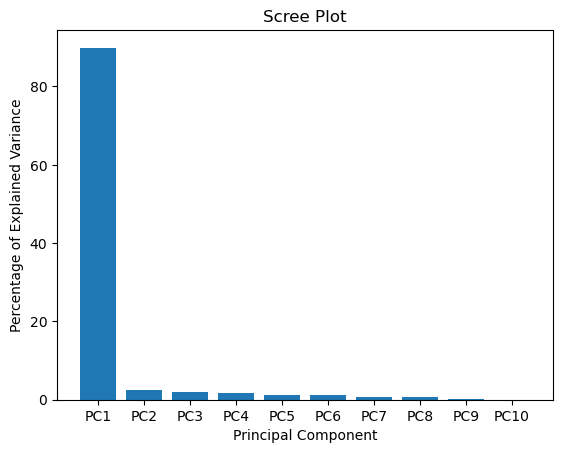

In [8]:
plt.bar(x = range(1,len(per_var)+1),height=per_var,tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title("Scree Plot")
plt.show()

In [9]:
pca_df = pd.DataFrame(pca_data,index=[*wt,*ko],columns=labels)

In [10]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,-9.651419,-0.970552,-0.377810,-2.263378,0.501232,-1.106935,1.193465,-0.046985,-0.546291,1.110223e-16
wt2,-9.120621,0.356925,-0.287699,-0.418968,-0.422257,-0.919074,-1.106783,1.482197,0.642716,5.551115e-16
wt3,-9.633719,-0.565784,3.068800,0.532540,1.248030,0.283217,-0.266298,-0.763808,0.439166,-7.771561e-16
wt4,-9.369265,-0.742184,-2.248948,-0.154391,-0.601705,1.379548,-1.023073,-0.999843,-0.175838,4.440892e-16
wt5,-9.634003,1.880428,-0.175678,2.306369,-0.767895,0.349408,1.152291,0.357463,-0.353814,6.661338e-16
ko1,9.452777,3.047794,1.131450,-1.088127,-0.731093,-0.517798,-0.728095,-0.514438,-0.536642,1.776357e-15
ko2,9.353148,0.589441,-0.117210,-1.312256,0.174875,2.094315,0.864218,0.427883,0.718548,1.221245e-15
ko3,9.679034,-2.805345,1.229201,0.569159,-0.811466,0.518310,-0.298096,0.740185,-0.779154,2.220446e-16
ko4,9.399794,0.315378,-1.586645,1.063861,2.637608,-0.508832,-0.292018,0.151988,-0.208255,1.110223e-16
ko5,9.524274,-1.106100,-0.635461,0.765191,-1.227331,-1.572159,0.504389,-0.834641,0.799564,5.551115e-16


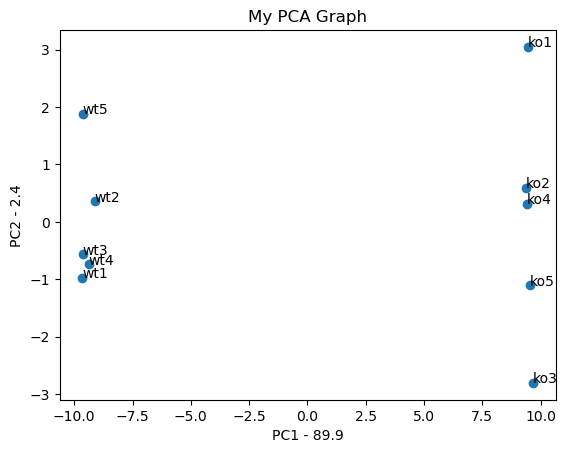

In [11]:
plt.scatter(pca_df.PC1,pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {}'.format(per_var[0]))
plt.ylabel('PC2 - {}'.format(per_var[1]))
for sample in pca_df.index:
    plt.annotate(sample,(pca_df.PC1.loc[sample],pca_df.PC2.loc[sample]))
plt.show()

In [12]:
loading_scores = pd.Series(pca.components_[0],index=genes)